# Tasks: Fundamentals of Data Analysis - 2023

*Author: Conor Tierney*

***

This notebook covers the tasks outlined as part of the Fundamentals of Data Analysis module in the Higher Diploma in Science in Computing in Data Analytics at ATU. 

## Tasks 
*****

1. Collatz Conjecture  
2. Penguins data set overview
3. Penguin data set - Probability distribution
4. Entropy
5. Plotting - Penguin data set  

## Import Libraries

*****

In [16]:
# Numerical operations
import numpy as np

# Data frames
import pandas as pd

# Plotting 
import matplotlib.pyplot as plt

# Task 1 - Collatz Conjecture

*******

> Task: The Collatz conjecture is a famous unsolved problem in mathematics[1]. The problem is to prove that if you start with any positive integer $x$ and repeatedly apply the function $f(x)$ below, you always get stuck in the repeating sequence 1, 4, 2, 1, 4, 2, . . .  
 
> This task is to verify, using Python, that the conjecture is true for the first 10,000 positive integers.  


At each stage of the loop, the program updates the number value based on whether it is even or odd.  

If the number $x$ is even, divide it by 2.  

If the number is odd, multiply by 3 and add 1.  
   
When number becomes 1, the program ends.

*The following is the code running the Collatz Conjecture [2].*

In [17]:
def f(x):
    # If x is even, divide it by two.
    if x % 2 == 0:
        return x // 2                      
    # If x is odd, multiply by 3 + 1.
    else:
        return (3 * x) + 1

In [18]:
def collatz(x):
    while x != 1:                                      # while loop executes as long as 'x' is not = 1.
        print (x, end=', ')                            # until x becomes one , keep printing value of x.
        x = f(x)
    print(x) 

*Verify the conjecture for the first 10,000 integers is true.*

In [19]:
collatz(10000)

10000, 5000, 2500, 1250, 625, 1876, 938, 469, 1408, 704, 352, 176, 88, 44, 22, 11, 34, 17, 52, 26, 13, 40, 20, 10, 5, 16, 8, 4, 2, 1


### References:
[1] [Collatz Conjecture](https://www.quantamagazine.org/why-mathematicians-still-cant-solve-the-collatz-conjecture-20200922/)  
[2] [collatz-conjecture-with-python](https://medium.com/@chakshugupta774/exploring-the-collatz-conjecture-with-python-7c5d9f31d233)     


# Task 2 - Penguins Data set Overview
*****

The famous Palmer penguin dataset is commonly used in data science and analytics. 
The dataset comprises information on penguins inhabiting the Palmer Archipelago, Antarctica. It features various attributes, including the name of the islands (Torgersen, Biscoe, or Dream), the penguin species (Adelie, Chinstrap, or Gentoo), bill length (mm), bill depth (mm), flipper length (mm), body mass (grams), and the sex of the penguins [1].  

The data was collected and made available by Dr. Kirsten Gorman and the Palmer station Antarctica LTER between the period 2007-09 [2].  
In total 344 samples were collected (however 2 samples have missing structural size measurements).

![Penguins Dataset](https://imgur.com/orZWHly.png)

## Types of Variables in the Penguin Dataset.

The penguin dataset contains *Categorical and Numerical Variables*. Of the 7 columns in the dataset, 3 are categorical (gender, island and species), and 4 are numerical (bill length, bill depth, flipper length and body mass).

The type of variable used to model them in python depends on the specific task or analysis we wish to perform using the dataset. I suggest that for classification tasks, we can use the categorical variables outlined below to classify the penguins into different species based on other features.  

The numerical variables are often used for predictive modeling and regression models [5].  


### **Categorical variables**:

1. *Species: This represents the penguin species. Contains 3 categories.*
- Adelie.
- Chinstrap.
- Gentoo.   
  
2. *Islands: Where the penguins were observed. Contains 3 categories.*
- Torgersen.
- Biscoe.
- Dream.   
  
3. *Sex: Gender of the penguins. Contains 2 categories*
- Male.
- Female.

### **Numeric variables**:

1. Bill Length: measured in mm
2. Bill Depth: measured in mm
3. Flipper Length: measured in mm
4. Body Mass: measured in grams(g)

### Investigation of the the Dataset.

In [20]:
import pandas as pd

import seaborn as sns

In [21]:
# read in the csv file.

df = pd.read_csv("https://raw.githubusercontent.com/mwaskom/seaborn-data/master/penguins.csv")

In [22]:
# show a summary of the penguin dataset.

print(df)

    species     island  bill_length_mm  bill_depth_mm  flipper_length_mm  \
0    Adelie  Torgersen            39.1           18.7              181.0   
1    Adelie  Torgersen            39.5           17.4              186.0   
2    Adelie  Torgersen            40.3           18.0              195.0   
3    Adelie  Torgersen             NaN            NaN                NaN   
4    Adelie  Torgersen            36.7           19.3              193.0   
..      ...        ...             ...            ...                ...   
339  Gentoo     Biscoe             NaN            NaN                NaN   
340  Gentoo     Biscoe            46.8           14.3              215.0   
341  Gentoo     Biscoe            50.4           15.7              222.0   
342  Gentoo     Biscoe            45.2           14.8              212.0   
343  Gentoo     Biscoe            49.9           16.1              213.0   

     body_mass_g     sex  
0         3750.0    MALE  
1         3800.0  FEMALE  
2     

In [23]:
# verify & list the types of data.
df.dtypes

# 'object' in Pandas is categorical or text data. 'float64' represents numerical data.


species               object
island                object
bill_length_mm       float64
bill_depth_mm        float64
flipper_length_mm    float64
body_mass_g          float64
sex                   object
dtype: object

In [24]:
# Verify the dataset's structure and variables.
df.head()

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,MALE
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,FEMALE
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,FEMALE
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,FEMALE


In [25]:
# describe the dataframe.

df.describe()

,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g
count,342.000000,342.000000,342.000000,342.000000
mean,43.921930,17.151170,200.915205,4201.754386
std,5.459584,1.974793,14.061714,801.954536
min,32.100000,13.100000,172.000000,2700.000000
25%,39.225000,15.600000,190.000000,3550.000000
50%,44.450000,17.300000,197.000000,4050.000000
75%,48.500000,18.700000,213.000000,4750.000000
max,59.600000,21.500000,231.000000,6300.000000


In [26]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 344 entries, 0 to 343
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   species            344 non-null    object 
 1   island             344 non-null    object 
 2   bill_length_mm     342 non-null    float64
 3   bill_depth_mm      342 non-null    float64
 4   flipper_length_mm  342 non-null    float64
 5   body_mass_g        342 non-null    float64
 6   sex                333 non-null    object 
dtypes: float64(4), object(3)
memory usage: 18.9+ KB


We can see above that the float categories are missing 2 null observations and the sex column is missing 11.

In [27]:
# checking for null values.
df.isnull().sum()

species               0
island                0
bill_length_mm        2
bill_depth_mm         2
flipper_length_mm     2
body_mass_g           2
sex                  11
dtype: int64

In [28]:
# These are the means for the 4 numeric variables.
df.mean()

C:\Users\conor\AppData\Local\Temp\ipykernel_35784\3116057842.py:2: FutureWarning: The default value of numeric_only in DataFrame.mean is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.mean()


bill_length_mm         43.921930
bill_depth_mm          17.151170
flipper_length_mm     200.915205
body_mass_g          4201.754386
dtype: float64

### Seaborn

Pairplot analysis - numeric variables

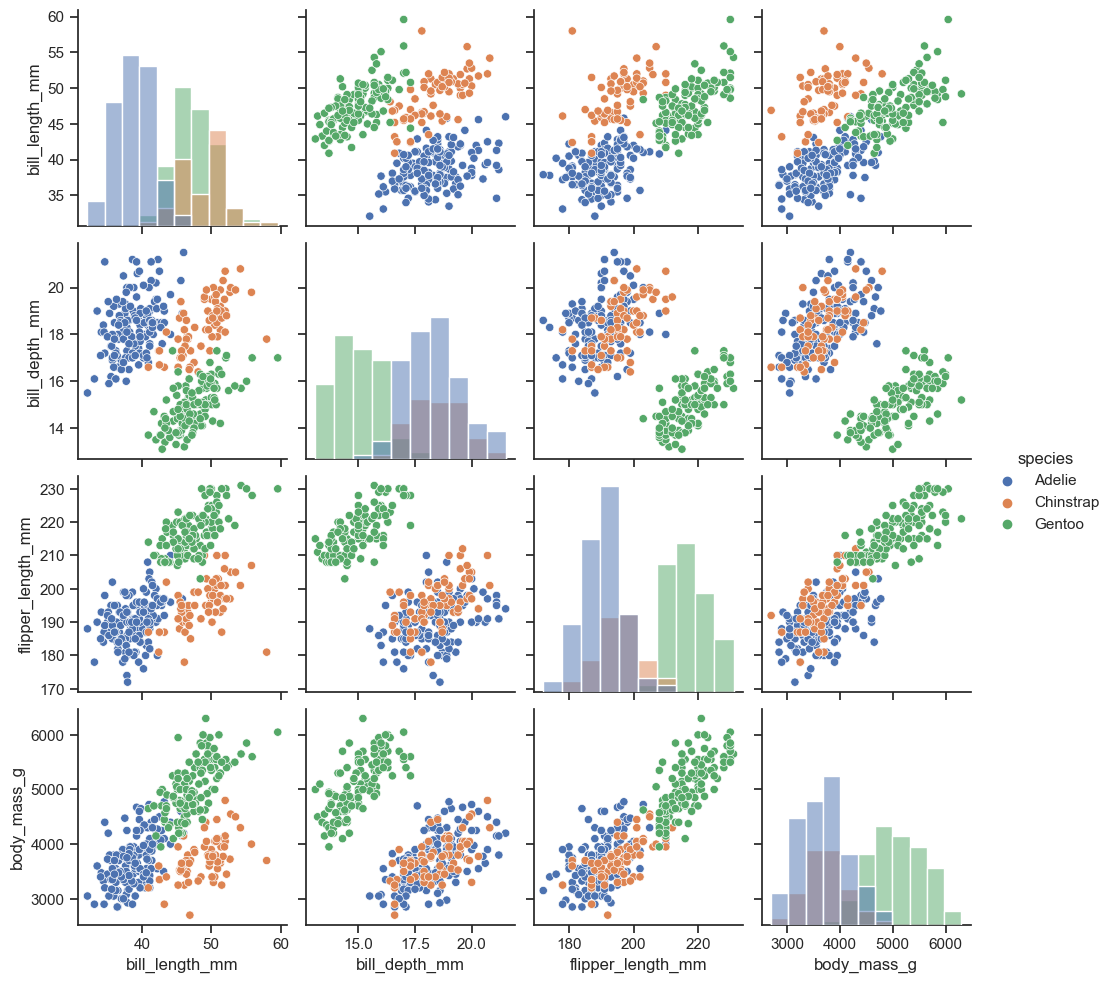

In [29]:
sns.set_theme(style="ticks")

df = sns.load_dataset("penguins")
sns.pairplot(df, hue="species", diag_kind='hist')

### References:
[1] [penguins dataset overview](https://towardsdatascience.com/penguins-dataset-overview-iris-alternative-9453bb8c8d95)  
[2] [palmer archipelago antarctica penguin data](https://www.kaggle.com/datasets/parulpandey/palmer-archipelago-antarctica-penguin-data)  
[3] [Image](https://www.kaggle.com/code/parulpandey/penguin-dataset-the-new-iris)  
[4] [python scripts](https://inria.github.io/scikit-learn-mooc/python_scripts/trees_dataset.html)  
[5] [python data types](https://realpython.com/python-data-types/)  
[6] [penguins.csv](https://raw.githubusercontent.com/mwaskom/seaborn-data/master/penguins.csv)   
[7] [Scatterplot matrix](https://seaborn.pydata.org/examples/scatterplot_matrix.html)  

# Task 3 - Probability Distribution
*****

> *Task : For each of the variables in the penguins data set, suggest what probability distribution from the numpy random distributions list is the most appropriate to model the variable.*


### Review of the variables in the Penguin Dataset.
The dataset contains Categorical and Numerical Variables. Of the 7 columns in the dataset, 3 are categorical (gender, island and species), and 4 are numeric (bill length, bill depth, flipper length and body mass).

**Numerical Variables**

- Body Mass (g)
- Flipper Length (mm)  
- Bill Length (mm)  
- Bill Depth (mm)

The normal (gaussian) distribution is a fair choice for these continuous variables. They should exhibit a bell shaped curve that is generally symmetrical.  

We can use $numpy.random.normal$ to model these variables. 


**Categorical Variables**  

For the species variable we can use discerete distribution using the $numpy.random.choice$ function ref.  

For sex and island variables we can also use the $numpy.random.choice$ function. 







### References:
[1] [numpy.random.normal](https://numpy.org/doc/stable/reference/random/generated/numpy.random.normal.html)  
[2] [numpy.random.choice](https://numpy.org/doc/stable/reference/random/generated/numpy.random.choice.html)

# Task 4: Entropy - Binomial distribution
****

> Task: Suppose you are flipping two coins, each with a probability *p* of giving heads. Plot the entropy of the total number of heads versus *p*.

### About
The **Binomial distribution** is a statistical probability distribution that models the likelihood of two independent outcomes based on specific assumptions. These assumptions include a single outcome per trial, equal probability of success for each trial, and independence between trials. Widely used in statistics, the binomial distribution is a discrete distribution, contrasting with continuous distributions like the normal distribution [1].

### Flipping 2 coins

*When flipping 2 coins there are 3 possible outcomes. Heads may appear zero, once or twice in the trial of 2 coin flips. The probability of Heads appearing zero times or twice is less than the likelihood of heads appearing once.  
This will be displayed below.*

### Probability Theory
**Flipping coins**  
When flipping 2 coins, each has a possible outcome of heads or tails.

**Entropy**   
Entropy measures the degree of disorder or unpredictability in a system i.e calculating the entropy of the number of heads in a coin toss [2].

### Code

In [30]:
# Flipping 2 coins 10000 times with a probability p= 0.5
flip_coins = np.random.binomial(2, 0.5, 10000)

# Show array.
flip_coins

array([2, 1, 1, ..., 1, 2, 2])

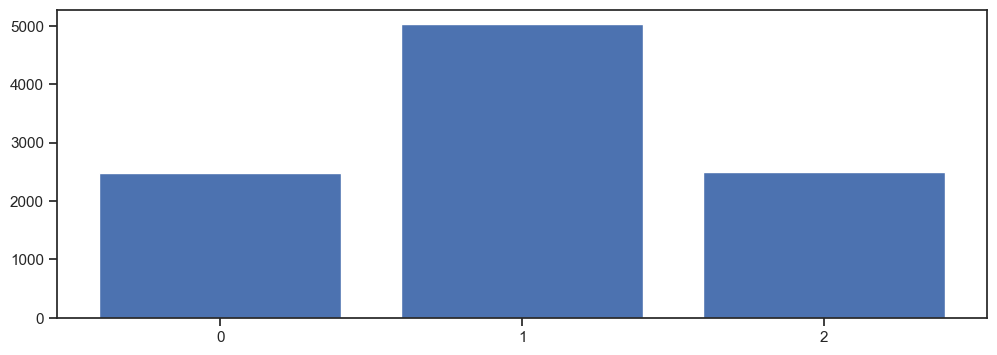

In [31]:
# Create an empty plot.
fig, ax = plt.subplots(figsize=(12, 4))

# Count the unqiue values in the array.
x, counts = np.unique(flip_coins, return_counts=True)

# Create a bar chart of flip_coins.
ax.bar(x, counts)

# Update the x-axis.
ax.set_xticks(x);

**Explanation as to why the above probablities are as they are**:  
  
*There is twice the chance of getting 1 heads with 2 coin flips. We can see this in the plot. We can see that the probability of getting heads from flipping 2 coins is 50%*  

*Possibilities:*
- heads/ heads (25%)  
- tails/tails (25%)  
- heads/ tails (25%)  
- tails/heads (25%)

### Plotting - Heads vs *p*
Plot the entropy of the total number of heads versus *p*.

In [32]:
# Code the Entropy using numpy.
# Define Entropy as H.
def H(p):
  return -(1 - p) * np.log2(1.0 - p) - p * np.log2(p)

In [33]:
# If the probability of 1 is half (50%) as we see in plot above
H(0.5)

1.0

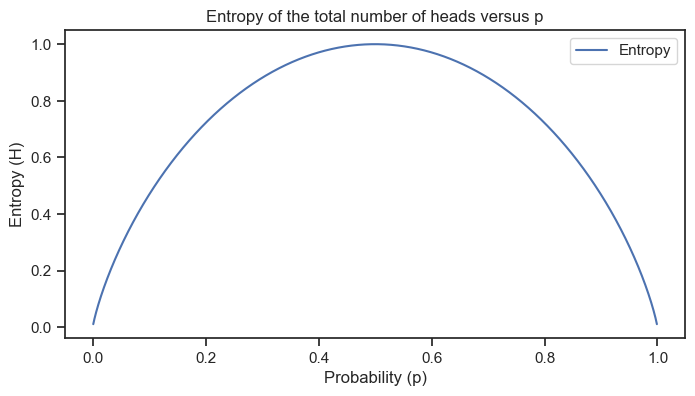

In [34]:
# Create an empty plot.
fig, ax = plt.subplots(figsize=(8,4))

# Define a range of probability values for the coin giving heads.
p = np.linspace(0.001, 0.999, 10001)

# Plot H(p).
ax.plot(p, H(p), label ='Entropy');
ax.set_title('Entropy of the total number of heads versus p')
ax.set_xlabel('Probability (p)')
ax.set_ylabel('Entropy (H)')
ax.legend()
plt.show()

## References - Task 4
[1]  [Binomial distribution](https://en.wikipedia.org/wiki/Binomial_distribution)  
[2]  [Entropy](https://en.wikipedia.org/wiki/Entropy_(information_theory))  
[3]  [entropy-quantifies-information](https://www.quantamagazine.org/how-claude-shannons-concept-of-entropy-quantifies-information-20220906/)  
[4]  [ATU Course Material](https://vlegalwaymayo.atu.ie/course/view.php?id=8771)   
[5]  [Numpy](https://numpy.org/doc/stable/reference/random/generator.html#distributions)  
[6]   [Binomial Distribution: Definition, Formula, Analysis, and Example](https://www.investopedia.com/terms/b/binomialdistribution.asp#:~:text=Binomial%20distribution%20is%20calculated%20by,and%20the%20number%20of%20trials.ref)  
[7]   [ the degree of disorder or uncertainty in a system](https://www.merriam-webster.com/dictionary/entropy#:~:text=broadly%20%3A%20the%20degree%20of%20disorder,universe%20toward%20death%20and%20disorder.)

## Task 5: Plotting - Penguin data set

*****

>Task: Create an appropriate individual plot for each of the variables in
the penguin data set.

### Outline the Variables in the Penguin data set


The penguin data set contains several types of variables, describing the different characteristics of the penguins. These can be devided into numerical and categorical variables.

- **Species**: This is a categorical varibale and it represents the penguin species. It has 3 categories: Adelie, Chinstrap, and Gentoo.  

- **Island** This is a categorical varibale and it represents the location where each penguin was observed. The 3 island are Biscoe, Dream, and Torgersen.  

- **Sex**: Categorises the gender of the penguin as male or female.

- **Bill length**: Numeric variable. Describes the length of the penguin's bill in millimeters.

- **Bill depth**: Numeric variable. Describes the depth of the penguin's bill in millimeters.

- **Flipper length**: Numeric variable. Describes the length of the penguin's flipper in millimeters.

- **Body mass**: Describes the body mass of the penguin in grams.





## Creating the Plots 

In [35]:
# plots
import matplotlib.pyplot as plt

# Fancier plots.
import seaborn as sns

# Data structure.
import pandas as pd

In [36]:
# read in the .csv file
df = pd.read_csv("https://raw.githubusercontent.com/mwaskom/seaborn-data/master/penguins.csv")

### Count plot for Categorical variables
Species, Islands and Sex

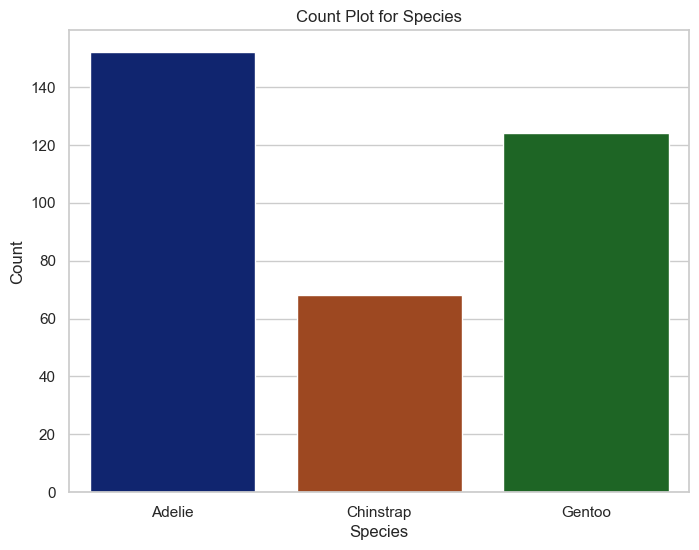

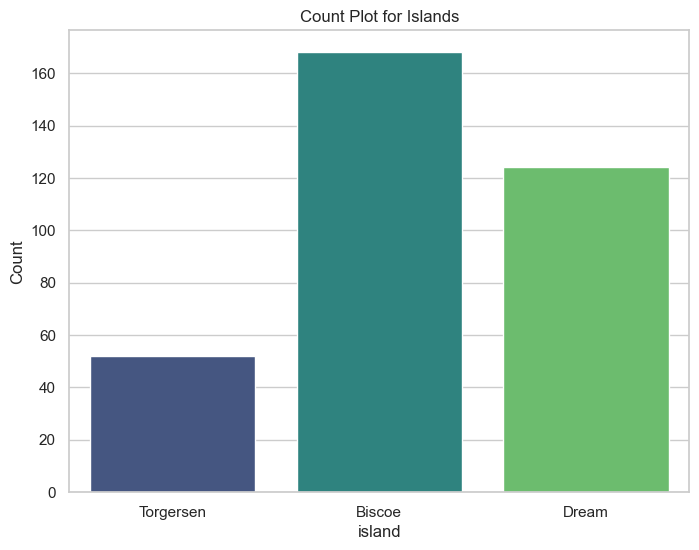

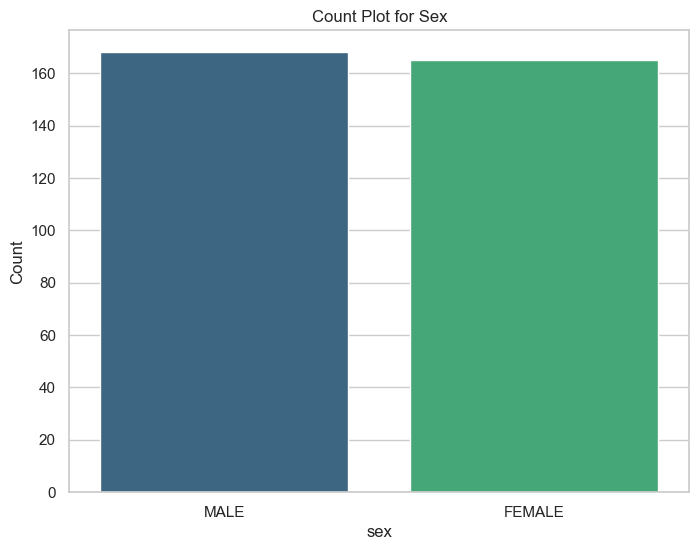

In [37]:
# Set the style 
sns.set(style="whitegrid")

# Plot Species variable using Seaborn
plt.figure(figsize=(8, 6))
sns.countplot(x='species', data=df, palette='dark')
plt.title('Count Plot for Species')
plt.xlabel('Species')
plt.ylabel('Count')
plt.show()

# Plot Island variable
plt.figure(figsize=(8, 6))
sns.countplot(x='island', data=df, palette='viridis')
plt.title('Count Plot for Islands')
plt.xlabel('island')
plt.ylabel('Count')
plt.show()

# Plot Sex variable
plt.figure(figsize=(8, 6))
sns.countplot(x='sex', data=df, palette='viridis')
plt.title('Count Plot for Sex')
plt.xlabel('sex')
plt.ylabel('Count')
plt.show()

### Histograms for Numeric Variables
Bill length, Bill depth, Flipper length, and Body mass

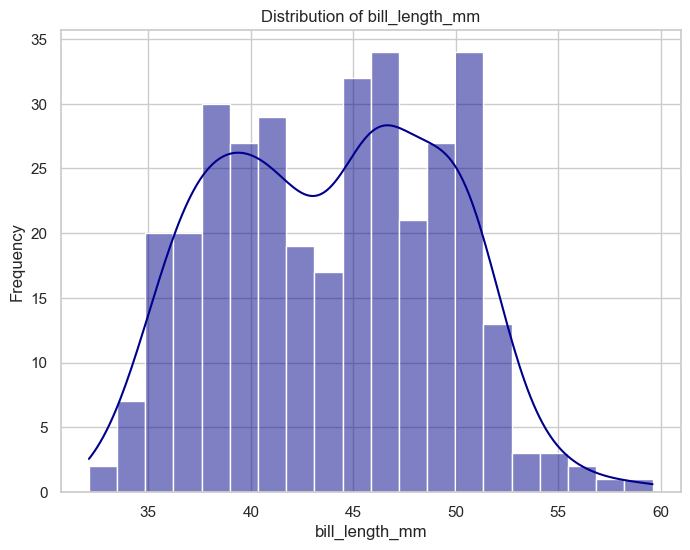

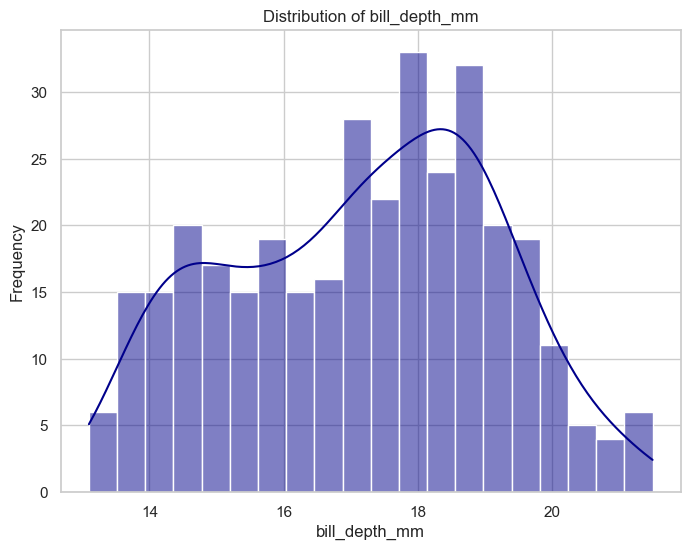

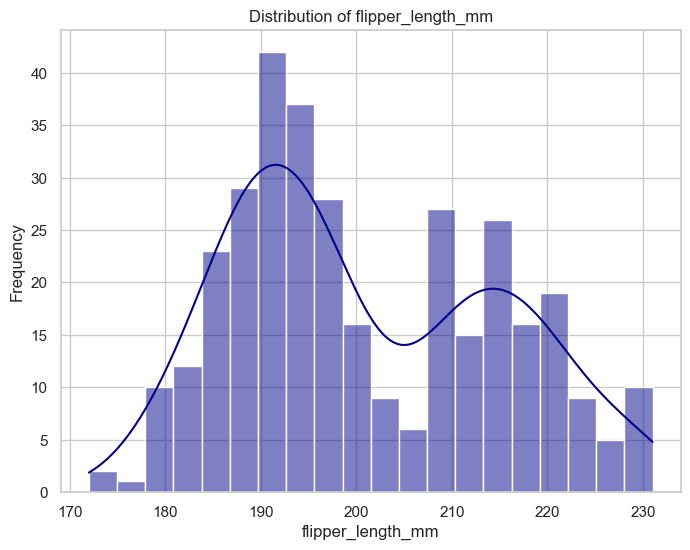

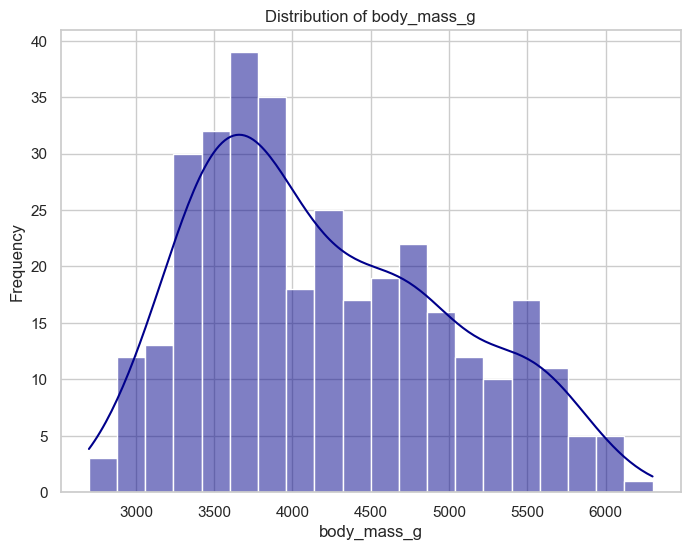

In [38]:
# Create function for individual variable histograms
def create_histogram(variable, color):
    plt.figure(figsize=(8, 6))
    sns.histplot(df[variable], bins=20, kde=True, color=color)
    plt.title(f'Distribution of {variable}')
    plt.xlabel(variable)
    plt.ylabel('Frequency')
    plt.show()

# Create list for numerical variables
num_var = ['bill_length_mm', 'bill_depth_mm', 'flipper_length_mm', 'body_mass_g']

# Create a loop for each variable and show histograms.
for variable in num_var:
    create_histogram(variable, color='darkblue')

## References - Task 5
[1][penguins.csv](https://github.com/mwaskom/seaborn-data/blob/master/penguins.csv)  
[2][matplotlib.style](https://matplotlib.org/stable/api/style_api.html#matplotlib.style.available)  
[3][style_sheets_reference](https://matplotlib.org/stable/gallery/style_sheets/style_sheets_reference.html)   
[4][seaborn setstyle](https://seaborn.pydata.org/generated/seaborn.set_style.html)   
[5][seaborn themes](https://python-charts.com/seaborn/themes/?utm_content=cmp-true)  


******

## End